# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [5]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

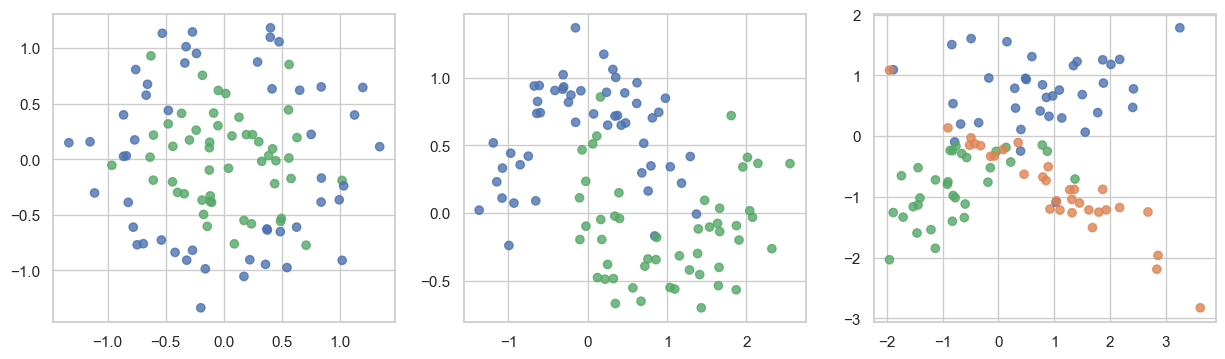

In [7]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [9]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

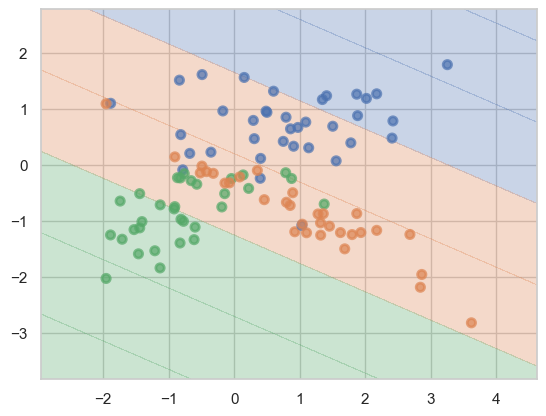

In [11]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

dataset number 0
train accuracy: 1.0
test accuracy: 0.7333333333333333
dataset number 1
train accuracy: 1.0
test accuracy: 0.8666666666666667
dataset number 2
train accuracy: 1.0
test accuracy: 0.8333333333333334


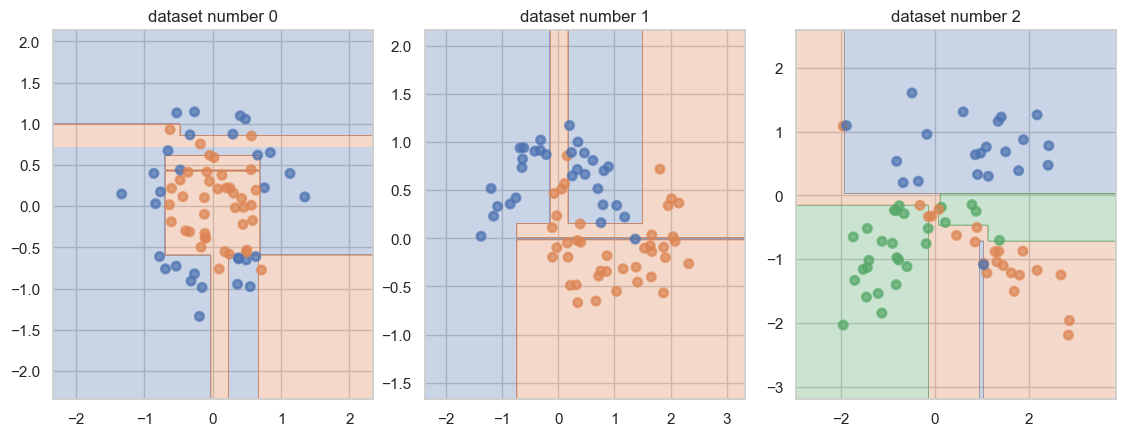

In [13]:
plt.figure(figsize=(12, 5))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree_cl = DecisionTreeClassifier().fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree_cl, X_train, y_train)
    plt.title('dataset number %i' %i)
    print('dataset number', i)
    print('train accuracy:', tree_cl.score(X_train, y_train))
    print('test accuracy:', tree_cl.score(X_test, y_test))
plt.show()

__Ответ:__ точность на тесте ниже, чем на трейне (на трейне вообще 1), следовательно, скорее всего, возникает проблема переобучения.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

min_samples_leaf=3:

dataset number 0
train accuracy: 0.9285714285714286
test accuracy: 0.8
dataset number 1
train accuracy: 0.9857142857142858
test accuracy: 0.7666666666666667
dataset number 2
train accuracy: 0.9142857142857143
test accuracy: 0.7666666666666667


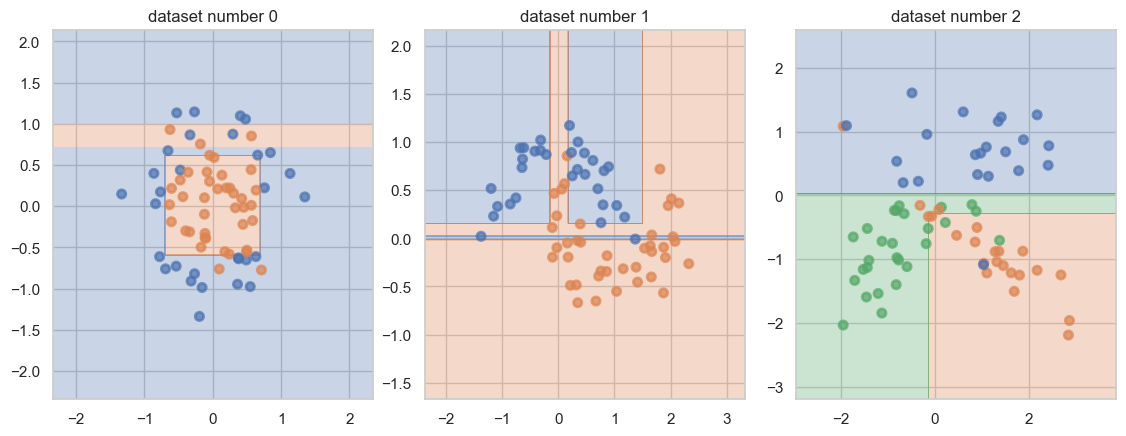

In [18]:
plt.figure(figsize=(12, 5))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree_cl = DecisionTreeClassifier(min_samples_leaf=3).fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree_cl, X_train, y_train)
    plt.title('dataset number %i' %i)
    print('dataset number', i)
    print('train accuracy:', tree_cl.score(X_train, y_train))
    print('test accuracy:', tree_cl.score(X_test, y_test))
plt.show()

min_samples_leaf=5:

dataset number 0
train accuracy: 0.8714285714285714
test accuracy: 0.9
dataset number 1
train accuracy: 0.9571428571428572
test accuracy: 0.7333333333333333
dataset number 2
train accuracy: 0.9
test accuracy: 0.7


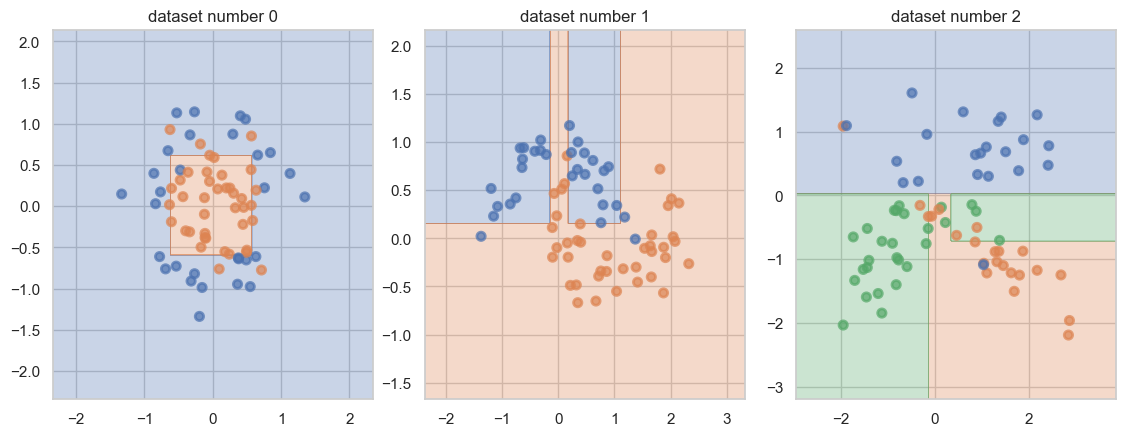

In [21]:
plt.figure(figsize=(12, 5))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree_cl = DecisionTreeClassifier(min_samples_leaf=5).fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree_cl, X_train, y_train)
    plt.title('dataset number %i' %i)
    print('dataset number', i)
    print('train accuracy:', tree_cl.score(X_train, y_train))
    print('test accuracy:', tree_cl.score(X_test, y_test))
plt.show()

min_samples_leaf=10:

dataset number 0
train accuracy: 0.8142857142857143
test accuracy: 0.7666666666666667
dataset number 1
train accuracy: 0.8714285714285714
test accuracy: 0.7666666666666667
dataset number 2
train accuracy: 0.8857142857142857
test accuracy: 0.7666666666666667


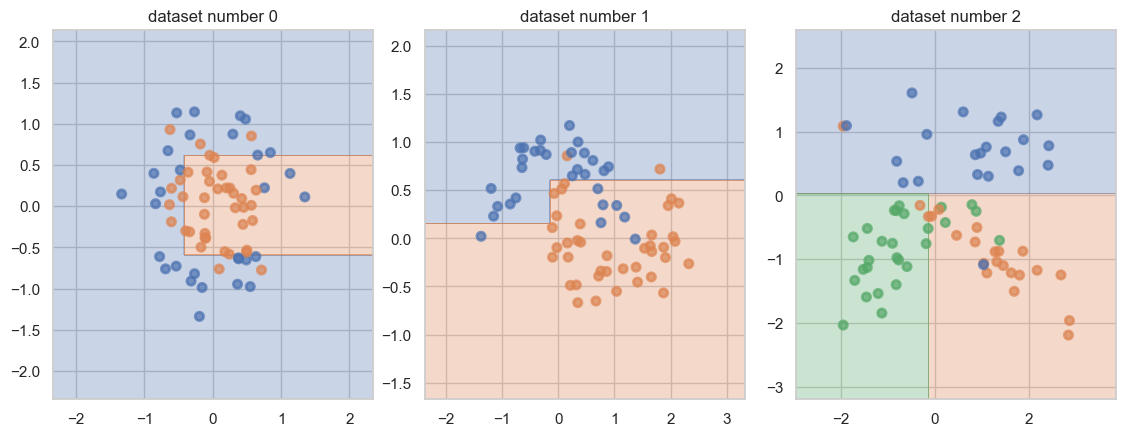

In [25]:
plt.figure(figsize=(12, 5))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree_cl = DecisionTreeClassifier(min_samples_leaf=10).fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree_cl, X_train, y_train)
    plt.title('dataset number %i' %i)
    print('dataset number', i)
    print('train accuracy:', tree_cl.score(X_train, y_train))
    print('test accuracy:', tree_cl.score(X_test, y_test))
plt.show()

так уже стало хуже, оптимально 5

max_depth=3:

dataset number 0
train accuracy: 0.8857142857142857
test accuracy: 0.7333333333333333
dataset number 1
train accuracy: 0.9142857142857143
test accuracy: 0.9333333333333333
dataset number 2
train accuracy: 0.9428571428571428
test accuracy: 0.8666666666666667


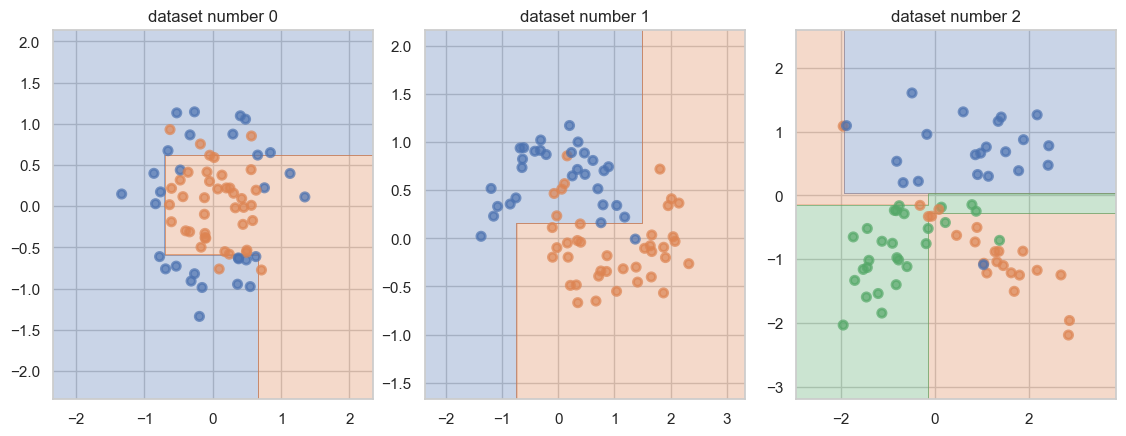

In [31]:
plt.figure(figsize=(12, 5))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree_cl = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree_cl, X_train, y_train)
    plt.title('dataset number %i' %i)
    print('dataset number', i)
    print('train accuracy:', tree_cl.score(X_train, y_train))
    print('test accuracy:', tree_cl.score(X_test, y_test))
plt.show()

max_depth=5:

dataset number 0
train accuracy: 0.9714285714285714
test accuracy: 0.7666666666666667
dataset number 1
train accuracy: 1.0
test accuracy: 0.8666666666666667
dataset number 2
train accuracy: 0.9714285714285714
test accuracy: 0.8


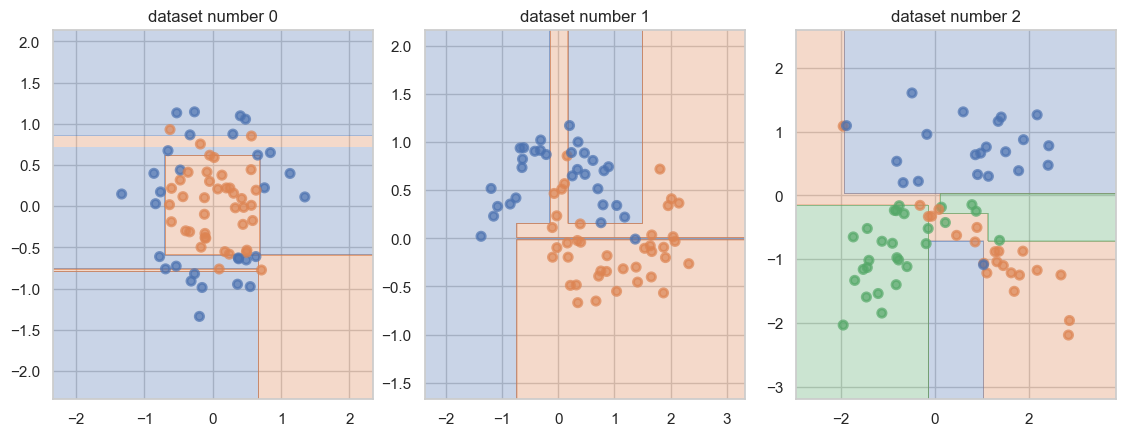

In [34]:
plt.figure(figsize=(12, 5))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree_cl = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree_cl, X_train, y_train)
    plt.title('dataset number %i' %i)
    print('dataset number', i)
    print('train accuracy:', tree_cl.score(X_train, y_train))
    print('test accuracy:', tree_cl.score(X_test, y_test))
plt.show()

max_depth=7:

dataset number 0
train accuracy: 1.0
test accuracy: 0.7666666666666667
dataset number 1
train accuracy: 1.0
test accuracy: 0.8666666666666667
dataset number 2
train accuracy: 1.0
test accuracy: 0.7666666666666667


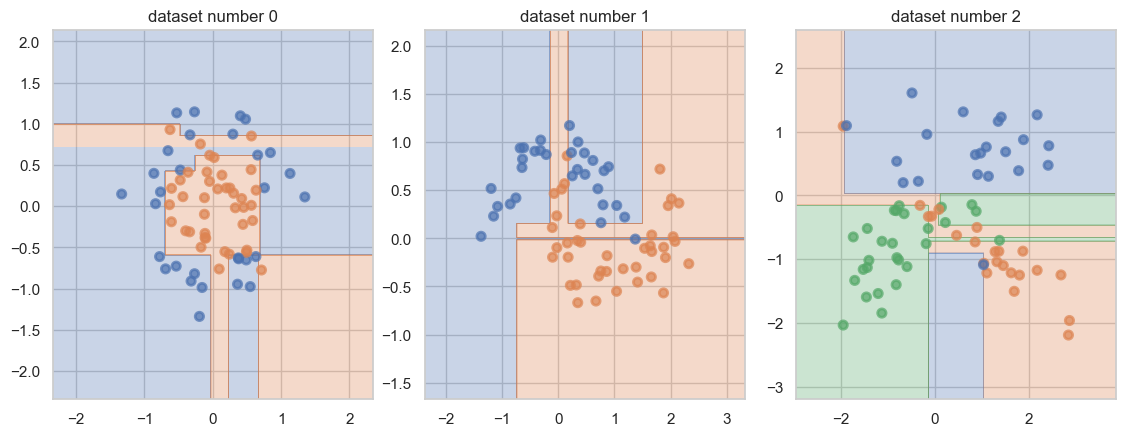

In [36]:
plt.figure(figsize=(12, 5))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree_cl = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree_cl, X_train, y_train)
    plt.title('dataset number %i' %i)
    print('dataset number', i)
    print('train accuracy:', tree_cl.score(X_train, y_train))
    print('test accuracy:', tree_cl.score(X_test, y_test))
plt.show()

dataset number 0
train accuracy: 0.8714285714285714
test accuracy: 0.9
dataset number 1
train accuracy: 0.9571428571428572
test accuracy: 0.7333333333333333
dataset number 2
train accuracy: 0.9
test accuracy: 0.7666666666666667


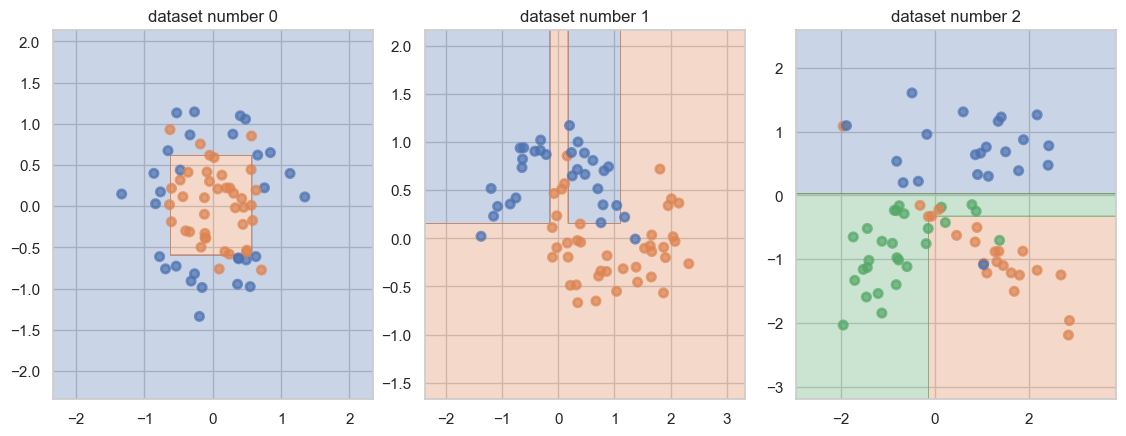

In [45]:
plt.figure(figsize=(12, 5))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree_cl = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5).fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree_cl, X_train, y_train)
    plt.title('dataset number %i' %i)
    print('dataset number', i)
    print('train accuracy:', tree_cl.score(X_train, y_train))
    print('test accuracy:', tree_cl.score(X_test, y_test))
plt.show()

В целом, тенденция везде одинаковая: при слишком маленьких значениях параметров, а также при слишком больших, модель выдает маленькую точность. при ограничении минимального количества листьев наилучшая точность на датасете 1, а при ограничении глубины дерева - на датасете 0

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Ответ:__

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

успешная посылка: 129697990

In [52]:
def find_best_split(feature_vector, target_vector):
    sorted_index = np.argsort(feature_vector)
    sorted_feature = feature_vector[sorted_index]
    sorted_target = target_vector[sorted_index]
    mask = sorted_feature[1:] != sorted_feature[:-1]
    thresholds = ((sorted_feature[1:] + sorted_feature[:-1]) / 2)[mask]

    R = np.size(sorted_target)
    R_size = np.arange(1, R)
    R_l = np.cumsum(sorted_target)
    R_l_p1 = R_l[:-1] / R_size
    R_l_p0 = 1 - R_l_p1
    R_r = R_l[-1] - R_l[:-1]
    R_r_p1 = R_r / (R - R_size)
    R_r_p0 = 1 - R_r_p1
    ginis = R_size / R * (R_l_p0 ** 2 + R_l_p1 ** 2 - 1) + (R - R_size) / R * (R_r_p0 ** 2 + R_r_p1 ** 2 - 1)
    ginis = ginis[mask]
    best_index = np.argmax(ginis)
    threshold_best = thresholds[best_index]
    gini_best = ginis[best_index]

    return thresholds, ginis, threshold_best, gini_best

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [50]:
df =pd.read_csv('students.csv')
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


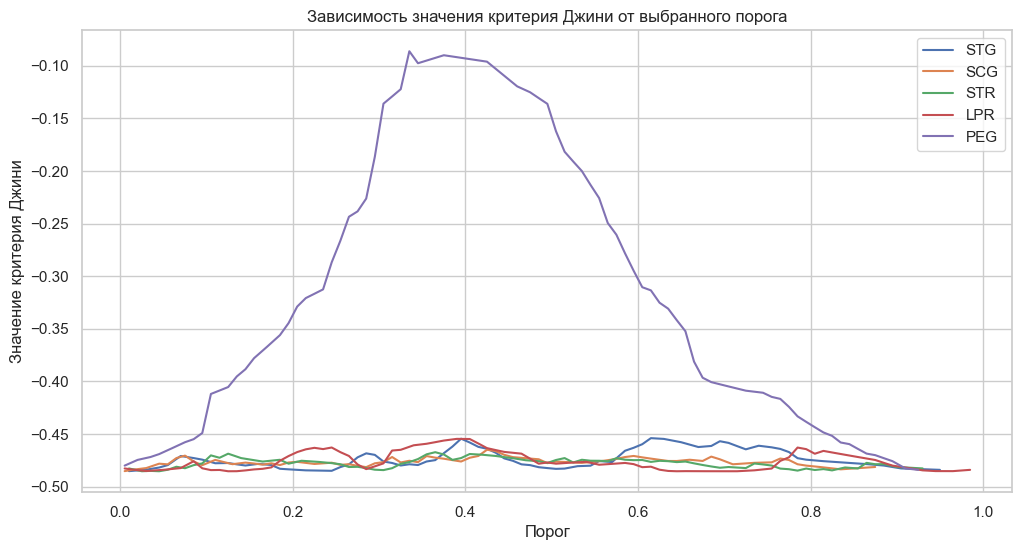

In [60]:
target = df['UNS']
features = df.drop(columns = 'UNS')

plt.figure(figsize=(12, 6))
plt.title('Зависимость значения критерия Джини от выбранного порога')
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')
for column_name in features.columns:
    thresholds, ginis, threshold_best, gini_best = find_best_split(features[column_name].values, target.values)
    plt.plot(thresholds, ginis, label=column_name)
plt.legend()
plt.grid(True)
plt.show()

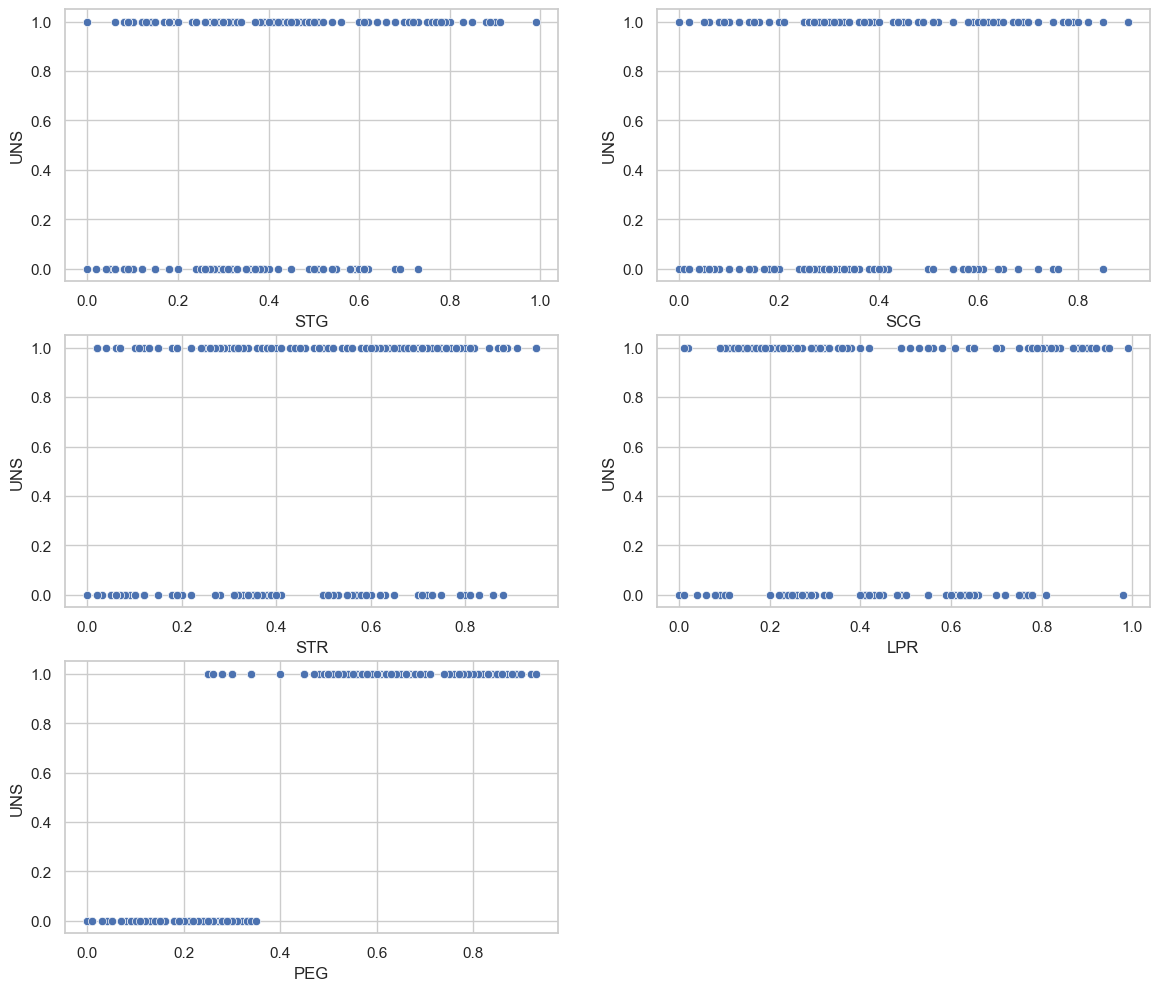

In [62]:
plt.figure(figsize=(14, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data=df, x=feature, y=target)

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Исходя из построенных кривых, деление нужно производить по признаку PEG, так как наибольшее значение критерия Джини достигается в нем. Это согласуется с scatter-графиками, т.к. значения этого признака, отсортированные по возрастанию, можно разделить на две части так, что в каждой из них будут объекты с преимущественно одинаковым значением целевой переменной. Кривая для "хороших" признаков имеет четкую точку максимума, а кривые для неразделимых признаков колеблются около одного значения.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

успешная посылка: 129754462

In [67]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=1, min_samples_leaf=1):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth=0):
        sub_X = np.array(sub_X)
        sub_y = np.array(sub_y)
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        if (self._max_depth is not None) and (depth >= self._max_depth):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        if len(sub_y) < self._min_samples_leaf:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])

                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            if len(np.unique(feature_vector)) == 1:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical": # здесь было с большой буквы
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if (feature_best is None) or (len(sub_X[split]) < self._min_samples_leaf):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0] # было most_common(1)
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}

        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], depth + 1) # здесь было перепутано

    def _predict_node(self, x, node):
        x = np.array(x)
        if node["type"] == "terminal":
            return node["class"]
        elif self._feature_types[node['feature_split']] == "real":
            if x[node["feature_split"]] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            if x[node["feature_split"]] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)


__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [83]:
data = pd.read_csv('agaricus-lepiota.data', sep=',')
data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [85]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

for col in data.columns:
    data.loc[:, col] = LabelEncoder().fit_transform(data.loc[:, col])
X = data.drop(['p'], axis=1)
y = data['p']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.5, random_state=42)

feature_types = ['categorical' for x in X_train]
tree = DecisionTree(feature_types)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('test accuracy =', np.sum(y_pred == y_test) / np.size(y_test))
y_pred_train = tree.predict(X_train)
print('train accuracy =', np.sum(y_pred_train == y_train) / np.size(y_train))

test accuracy = 1.0
train accuracy = 1.0


ура победа

__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [160]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=1, min_samples_leaf=1):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth=0):
        sub_X = np.array(sub_X)
        sub_y = np.array(sub_y)
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        if (self._max_depth is not None) and (depth >= self._max_depth):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        if len(sub_y) < self._min_samples_leaf:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])

                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            if len(np.unique(feature_vector)) == 1:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if (feature_best is None) or (len(sub_X[split]) < self._min_samples_leaf):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}

        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        x = np.array(x)
        if node["type"] == "terminal":
            return node["class"]
        elif self._feature_types[node['feature_split']] == "real":
            if x[node["feature_split"]] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            if x[node["feature_split"]] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

    @staticmethod
    def accuracy_score(y_true, y_pred):
        return np.mean(y_true == y_pred)

In [162]:
df = pd.read_csv('tic-tac-toe-endgame.csv')
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [98]:
for col in df.columns:
    df.loc[:, col] = LabelEncoder().fit_transform(df.loc[:, col])
X = df.drop(['V10'], axis=1)
y = df['V10']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.5, random_state=42)
feature_types = ['categorical' for x in X_train]

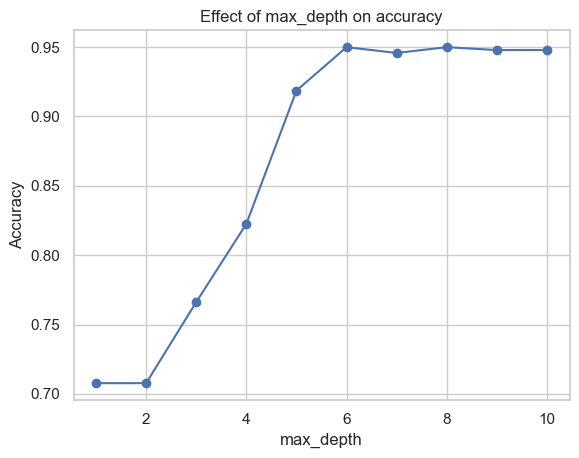

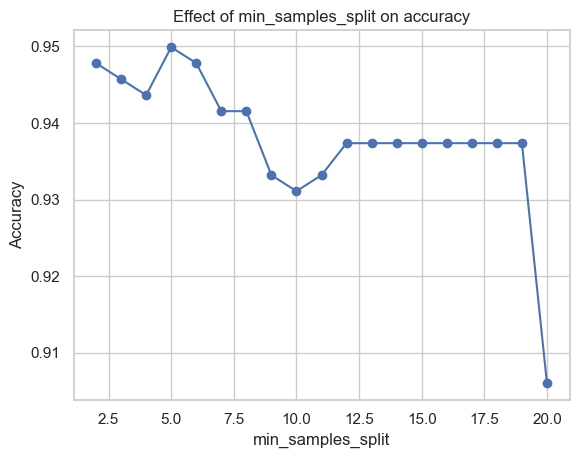

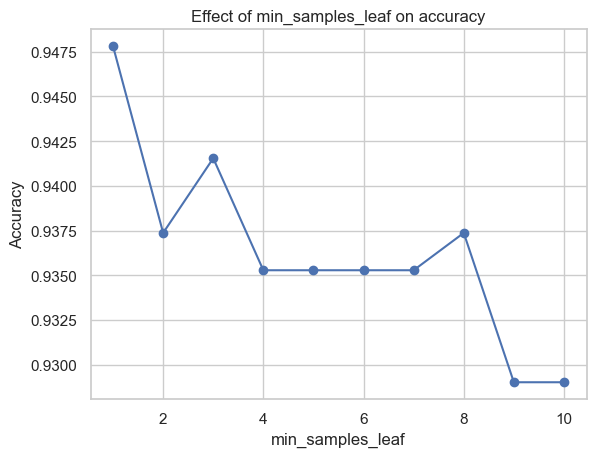

In [100]:
def plot_parameter_effect(param_name, param_values, X_train, X_test, y_train, y_test):
    accuracies = []
    for value in param_values:
        if param_name == "max_depth":
            tree = DecisionTree(feature_types, max_depth=value)
        elif param_name == "min_samples_split":
            tree = DecisionTree(feature_types, min_samples_split=value)
        elif param_name == "min_samples_leaf":
            tree = DecisionTree(feature_types, min_samples_leaf=value)
        else:
            raise ValueError("Unknown parameter name")

        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        accuracy = DecisionTree.accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    plt.plot(param_values, accuracies, marker='o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.title(f'Effect of {param_name} on accuracy')
    plt.show()

plot_parameter_effect("max_depth", range(1, 11), X_train, X_test, y_train, y_test)
plot_parameter_effect("min_samples_split", range(2, 21), X_train, X_test, y_train, y_test)
plot_parameter_effect("min_samples_leaf", range(1, 11), X_train, X_test, y_train, y_test)

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

class LinearRegressionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, n_quantiles=10):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.n_quantiles = n_quantiles
        self.tree = None

    def find_best_split(self, X, y):
        best_split = None
        min_loss = float('inf')
        n_samples, n_features = X.shape

        for feature_index in range(n_features):
            unique_values = np.unique(X[:, feature_index])
            if len(unique_values) <= 1:
                continue
            thresholds = np.quantile(unique_values, q=np.linspace(0, 1, self.n_quantiles + 2)[1:-1])

            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = X[:, feature_index] > threshold
                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue

                X_left, y_left = X[left_mask], y[left_mask]
                X_right, y_right = X[right_mask], y[right_mask]

                left_model = LinearRegression().fit(X_left, y_left)
                y_left_pred = left_model.predict(X_left)
                loss_left = mean_squared_error(y_left, y_left_pred)
                right_model = LinearRegression().fit(X_right, y_right)
                y_right_pred = right_model.predict(X_right)
                loss_right = mean_squared_error(y_right, y_right_pred)
                n_left = len(y_left)
                n_right = len(y_right)
                total_loss = (n_left / n_samples) * loss_left + (n_right / n_samples) * loss_right
                if total_loss < min_loss:
                    min_loss = total_loss
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_loss': loss_left,
                        'right_loss': loss_right,
                        'left_model': left_model,
                        'right_model': right_model
                    }
        
        return best_split
    
    def _fit_node(self, sub_X, sub_y, node, current_depth=0):
        if len(sub_y) < self.min_samples_split or current_depth >= self.max_depth:
            node["type"] = "terminal"
            model = LinearRegression().fit(sub_X, sub_y)
            node["model"] = model
            return

        best_split = self.find_best_split(sub_X, sub_y)
        if best_split is None:
            node["type"] = "terminal"
            model = LinearRegression().fit(sub_X, sub_y)
            node["model"] = model
            return

        node["type"] = "nonterminal"
        node["feature_split"] = best_split['feature_index']
        node["threshold"] = best_split['threshold']
        node["left_model"] = best_split['left_model']
        node["right_model"] = best_split['right_model']

        left_mask = sub_X[:, best_split['feature_index']] <= best_split['threshold']
        right_mask = sub_X[:, best_split['feature_index']] > best_split['threshold']

        node["left_child"], node["right_child"] = {}, {}

        self._fit_node(sub_X[left_mask], sub_y[left_mask], node["left_child"], current_depth + 1)
        self._fit_node(sub_X[right_mask], sub_y[right_mask], node["right_child"], current_depth + 1)

    def _predict_node(self, x, node):
        while node["type"] == "nonterminal":
            feature = node["feature_split"]
            if x[feature] <= node["threshold"]:
                node = node["left_child"]
            else:
                node = node["right_child"]
        
        if node["type"] == "terminal":
            return node["model"].predict([x])[0]

    def fit(self, X, y):
        self.tree = {}
        self._fit_node(X, y, self.tree)

    def predict(self, X):
        return np.array([self._predict_node(x, self.tree) for x in X])
    
    def set_params(self, **params):
        for param, value in params.items():
            if param == 'max_depth':
                self.max_depth = value
            elif param == 'min_samples_split':
                self.min_samples_split = value
            elif param == 'min_samples_leaf':
                self.min_samples_leaf = value
            elif param == 'n_quantiles':
                self.n_quantiles = value
        return self

    def get_params(self, deep=True):
        return {
            'max_depth': self.max_depth,
            'min_samples_split': self.min_samples_split,
            'min_samples_leaf': self.min_samples_leaf,
            'n_quantiles': self.n_quantiles
        } 

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [166]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [182]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

model = GridSearchCV(LinearRegressionTree(), param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
model.fit(X_train, y_train)
best_model = model.best_estimator_
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.5815335878032752
MAE: 0.4015893523175817


In [186]:
model1 = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
model1.fit(X_train, y_train)
best_model1 = model1.best_estimator_
y_pred1 = best_model1.predict(X_test)

rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
mae1 = mean_absolute_error(y_test, y_pred1)

print(f"RMSE: {rmse1}")
print(f"MAE: {mae1}")

RMSE: 0.6738339616489634
MAE: 0.47481849357719236


на моем дереве обе ошибки меньше, значит, оно работает лучше

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

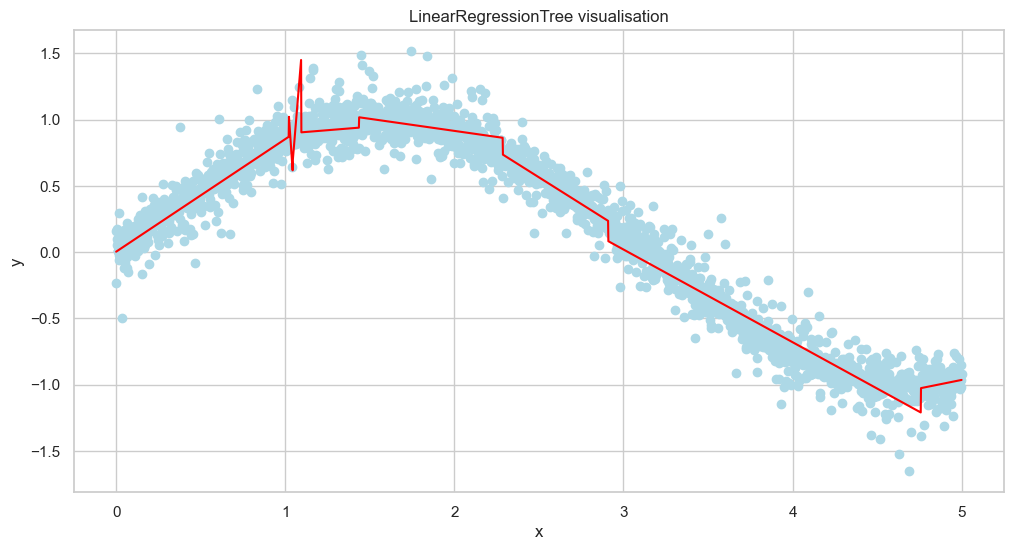

In [195]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

lin_tree = LinearRegressionTree(max_depth=3)
lin_tree.fit(x_train, y_train)
y_pred = lin_tree.predict(x)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='lightblue')
plt.plot(x, y_pred, color='red')
plt.title('LinearRegressionTree visualisation')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

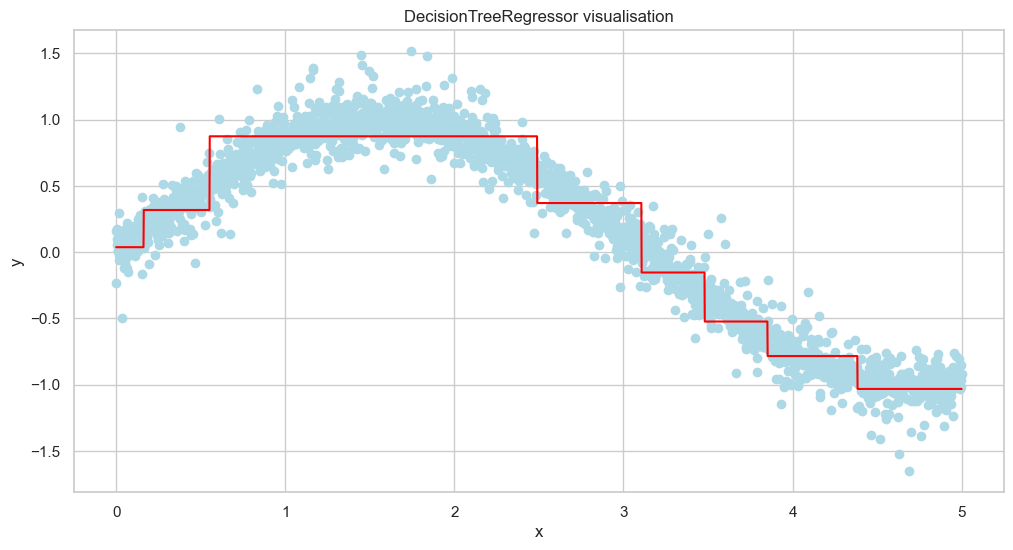

In [197]:
regr_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
regr_tree.fit(x_train, y_train)
y_pred = regr_tree.predict(x)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='lightblue')
plt.plot(x, y_pred, color='red')
plt.title('DecisionTreeRegressor visualisation')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Ответ:** LinearRegression tree может переобучиться, однако также может выдавать неконстантные предсказания, в отличие от DecisionRegression tree

Вставьте что угодно, описывающее ваши впечатления от этого задания:

тяжело....